# Deskripsi Singkat


Convex hull dari himpunan titik S adalah himpunan convex terkecil (convex polygon) yang mengandung S

Himpunan titik pada bidang planar disebut convex jika untuk sembarang dua titik pada bidang tersebut (misal p dan q), seluruh segmen garis yang berakhir di p danq berada pada himpunan tersebut. 


> Algoritma *divide and conquer* untuk menentukan *convex hull* disadur dari Bahan Kuliah IF2211 Stima - Algoritma *Divide and Conquer* Bagian 4 Oleh: Nur Ulfa Maulidevi & Rinaldi Munir

## Inisiasi *library* yang dibutuhkan

Pada notebook ini, akan digunakan 4 *library*:
1.   numpy (digunakan untuk melakukan operasi pada tipe data bentukan)
2.   pandas (digunakan untuk mengolah data dalam bentuk dataframe)
3.   matplotlib (digunakan untuk melakukan visualisasi data)
4.   sklearn (digunakan untuk mendapatkan sample dataset)

Sebelum menjalankan sel dibawah, pastikan keempat *library* telah tersedia. Apabila notebook dijalankan di *local*, dapat dilakukan instalasi *package* terlebih dahulu melalui pip melalui terminal dengan perintah 
`pip install (nama_library)`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## *Library* myConvexHull

*Library* myConvexHull dapat mengembalikan convex hull dari kumpulan data 2 dimensi. 
Penjelasan mengenai *library* ini dijelaskan secara langsung menggunakan komentar pada kode blok program. 

In [2]:
class myConvexHull:
  '''
  Convex hull dari himpunan titik S adalah himpunan convex terkecil 
  (convex polygon) yang mengandung S

  Himpunan titik pada bidang planar disebut convex jika untuk sembarang dua titik
  pada bidang tersebut (misal p dan q), seluruh segmen garis yang berakhir di p dan
  q berada pada himpunan tersebut. 

  Algoritma divide and conquer untuk menentukan convex hull 
  disadur dari Bahan Kuliah IF2211 Stima - Algoritma Divide and Conquer Bagian 4
  Oleh: Nur Ulfa Maulidevi & Rinaldi Munir

  '''

  # ==== User defined-constructor dengan masukan arrayTitik =====
  # arrayTitik merupakan object ndarray 2 dimensi (bentukan dari library numpy)
  # atau dalam tipe data list (akan dilakukan validasi)
  def __init__(self, arrayTitik):
    # inisiasi atribut simplices dengan list kosong
    # simplices merupakan variabel yang menampung
    # pasangan indeks pada arrayTitik yang membentuk convex hull
    self.simplices = []

    # inisiasi atribut setOfConvexHull dengan list kosong
    # setOfConvexHull merupakan variabel yang menampung
    # pasangan titik yang membentuk convex hull
    self.setOfConvexHull = []

    # inisiasi atribut S, mengubah tipe data arrayTitik
    # dari object ndarray menjadi list
    self.S = self.fromArraytoList(arrayTitik)

    # inisiasi atribut originalS
    # menyimpan informasi kumpulan titik sebelum diurutkan
    self.originalS = self.S

    # memanggil method untuk mengurutkan kumpulan titik
    self.sortList()

    # validasi banyak titik
    # convex hull hanya dapat dibentuk oleh dua titik unik atau lebih
    if len(list(set(tuple(element) for element in self.S))) > 1: 
      self.convexHullAwal()
    # else: len(self.S) <= 1
    # do nothing

  # ==== Kelompok Method Type Converter ====
  def fromArraytoList(self, array):
    # mengubah tipe object array menjadi tipe list
    if (type(array) == list):
        return array
    return np.ndarray.tolist(array)

  def sortList(self):
    # Kumpulan titik diurutkan berdasarkan nilai absis yang menaik 
    # jika ada nilai absis yang sama
    # maka diurutkan dengan nilai ordinat yang menaik
    sortbyX = sorted(self.S, key=lambda x: x[1])
    sortbyY = sorted(sortbyX, key=lambda x: x[0])
    self.S = sortbyY
  
  # ==== Kelompok Method Getter ====
  def getElmtIndex(self, element):
    # mendapatkan indeks elemen pada list
    for i in range(len(self.originalS)):
      if self.originalS[i] == element :
        return i

  def getp1pn(self):
    # mendapatkan p1 dan pn
    # S merupakan kumpulan titik yang telah diurut
    # p1 = titik dengan absis paling minimum = elemen pertama S
    # pn = titik dengan absis paling maksimum = elemen terakhir S
    return self.S[0],self.S[len(self.S)-1]

  # ==== Kelompok Method Operasi Dasar ====
  def determinan(self,p1,p2,p3):
    # menghitung determinan matriks yang terbentuk dari tiga titik
    '''
    | x1 y1 1 |
    | x2 y2 1 |  = x1*y2 + x3*y1 + x2*y3 - x3*y2 - x2*y1 - x1*y3
    | x3 y3 1 |
    sumber : Bahan Kuliah IF2211 Stima - Algoritma Divide and Conquer Bagian 4
             Oleh: Nur Ulfa Maulidevi & Rinaldi Munir
    '''
    return p1[0] * p2[1] + p3[0] * p1[1] + p3[1] * p2[0] - p3[0] * p2[1] - p2[0] * p1[1] - p1[0] * p3[1]

  
  def jarakTitik(self,p1,p2,p3):
    # menghitung jarak dari titik ke garis yang dibentuk antara dua titik
    '''
    d(P1(x1,y1),P2(x2,y2),P3(x3,y3)) = abs((x2-x1)(y1-y3) - (x1-x3)(y2-y1)) / sqrt((x2-x1)^2 + (y2-y1)^2)
    sumber : https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line#Line_defined_by_two_points
    '''
    return abs((p2[0]-p1[0])*(p1[1]-p3[1]) - (p1[0]-p3[0])*(p2[1]-p1[1])) / ((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)**(0.5)
    

  # ==== Kelompok Method Operasi List ====
  def bagiSisi(self,p1,pn,S):
    # S merupakan himpunan titik
    # akan dibagi S ke dua bagian, bagian atas atau bagian bawah dari
    # garis yang dibentuk oleh titik p1 dan pn
    # S1 merupakan kumpulan titik bagian atas
    # S2 merupakan kumpulan titik bagian bawah
    S1 = []
    S2 = []

    # pembagian ditentukan melalui determinan yang terbentuk oleh tiga titik
    for p3 in S:
      if((p1 != p3) and (pn != p3)):
        detTitik = self.determinan(p1,pn, p3)
        if detTitik > 0 : # Jika determinan positif maka titik p3(x3,y3) berada dibagian atas
          S1.append(p3)
        elif detTitik < 0 : # Jika determinan negatif maka titik p3(x3,y3) berada dibagian bawah
          S2.append(p3)
        # else : determinan 0, abaikan titik (berada pada garis)

    return S1, S2

  def titikTerjauh(self,p1,pn,S):
    # mencari titik terjauh dari garis yang dibentuk oleh p1 dan pn
    jarakMaks = 0
    pmax = S[0]
    for p3 in S:
      tempJarak = self.jarakTitik(p1,pn,p3)
      if tempJarak > jarakMaks:
        jarakMaks = tempJarak
        pmax = p3
    return pmax

  # ==== Kelompok Method Operasi Utama ====
  def convexHullAwal(self):
    # mendapatkan p1 dan pn 
    p1,pn = self.getp1pn()
    # membagi S menjadi dua bagian 
    S1, S2 = self.bagiSisi(p1,pn,self.S)
    # lakukan operasi convex hull untuk bagian atas
    self.convexHullAtas(p1,pn,S1)
    # lakukan operasi convex hull untuk bagian bawah
    self.convexHullBawah(p1,pn,S2)

  def convexHullAtas(self,p1,pn,S):
    # membentuk convex hull di bagian atas secara rekursif

    # basis
    if len(S) == 0 :
      # jika tidak ada titik lagi pada S 
      # maka p1 dan pn menjadi pembentuk convex hull
      self.appendPoints(p1,pn)

    # rekurens
    else:
      # mencari titik terjauh 
      pmax = self.titikTerjauh(p1,pn,S)
      # mengambil sisi bagian kiri atas saja 
      S11,_ = self.bagiSisi(p1,pmax,S)
      # mengambil sisi bagian kanan atas saja 
      S12,_ = self.bagiSisi(pmax,pn,S)
      # lakukan operasi convex hull untuk bagian kiri atas
      self.convexHullAtas(p1,pmax,S11)
      # lakukan operasi convex hull untuk bagian kanan atas
      self.convexHullAtas(pmax,pn,S12)

  def convexHullBawah(self,p1,pn,S):
    # membentuk convex hull di bagian bawah secara rekursif

    # basis
    if len(S) == 0 :
      # jika tidak ada titik lagi pada S 
      # maka p1 dan pn menjadi pembentuk convex hull
      self.appendPoints(p1,pn)

    # rekurens
    else:
      # mencari titik terjauh 
      pmax = self.titikTerjauh(p1,pn,S)
      # mengambil sisi bagian kiri bawah saja 
      _,S21 = self.bagiSisi(p1,pmax,S)
      # mengambil sisi bagian kanan bawah saja 
      _,S22 = self.bagiSisi(pmax,pn,S)
      # lakukan operasi convex hull untuk bagian kiri bawah
      self.convexHullBawah(p1,pmax,S21)
      # lakukan operasi convex hull untuk bagian kanan bawah
      self.convexHullBawah(pmax,pn,S22)

  def appendPoints(self,p1,pn):
    # menambahkan pasangan (p1,pn) sebagai pembentuk convex hull
    # mencari indeks untuk titik p1 dan pn pada originalS
    indeksp1 = self.getElmtIndex(p1) 
    indekspn = self.getElmtIndex(pn)
    self.simplices.append([indeksp1,indekspn])
    self.setOfConvexHull.append([p1,pn])



## Pengolahan dan Visualisasi Data

Dibawah ini, didefinisikan fungsi/prosedur untuk mengolah dan memvisualisasikan data. *Library* yang telah dibuat dan didefinisikan pada sel sebelumnya akan digunakan. Pengujian dari *library* dapat dilihat dengan hasil visualisasi yang ditampilkan. 

In [3]:
#create a DataFrame
def createDataFrame(data):
  df = pd.DataFrame(data.data, columns=data.feature_names)
  df['Target'] = pd.DataFrame(data.target)
  return df

#visualisasi hasil ConvexHull
def visualisasiConvexHull(df,a,b):
  plt.figure(figsize = (10, 6))
  colors = ['b','r','g','c','m','y','k']
  plt.title(data.feature_names[a] + ' vs ' + data.feature_names[b])
  plt.xlabel(data.feature_names[a])
  plt.ylabel(data.feature_names[b])
  for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[a,b]].values
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
      plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%7])
  plt.legend()

Dataset yang akan digunakan adalah:
1.   Iris
2.   Wine
3.   Breast Cancer 
4.   Digits

Data set di atas diambil dari https://scikit-learn.org/stable/datasets/toy_dataset.html

Berikut ini adalah hasil visualisasi sesuai dengan pasangan atributnya. Garis yang terhubung adalah *convex hull* yang dibentuk oleh *library* myConvexHull


### 1. Dataset Iris : Petal Length vs Petal Width

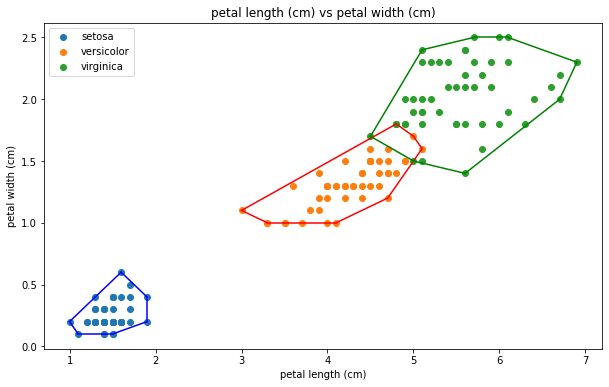

In [4]:
data = datasets.load_iris()
df = createDataFrame(data)
visualisasiConvexHull(df,2,3)

### 2. Dataset Iris : Sepal Length vs Sepal Width

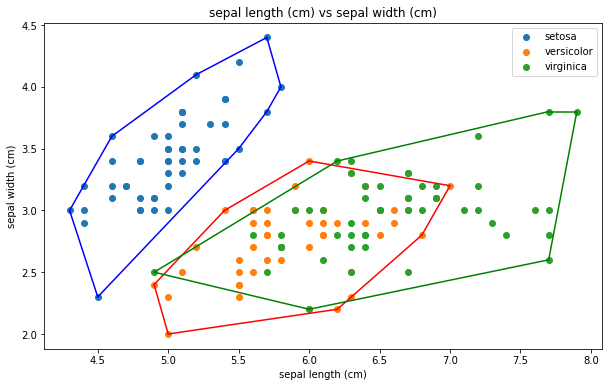

In [5]:
data = datasets.load_iris()
df = createDataFrame(data)
visualisasiConvexHull(df,0,1)

### 3. Dataset Wine : Alcohol vs Malic Acid

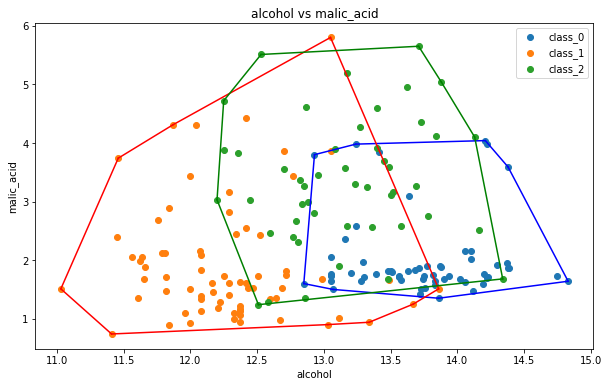

In [6]:
data = datasets.load_wine()
df = createDataFrame(data)
visualisasiConvexHull(df,0,1)

### 4. Dataset Wine : Ash vs Alcalinity of Ash

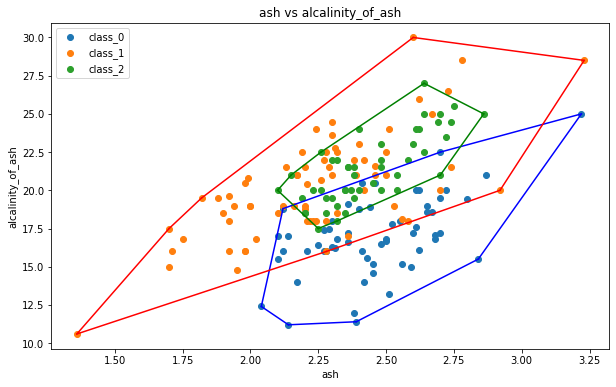

In [7]:
data = datasets.load_wine()
df = createDataFrame(data)
visualisasiConvexHull(df,2,3)

### 5. Dataset Wine : Magnesium vs Total Phenols

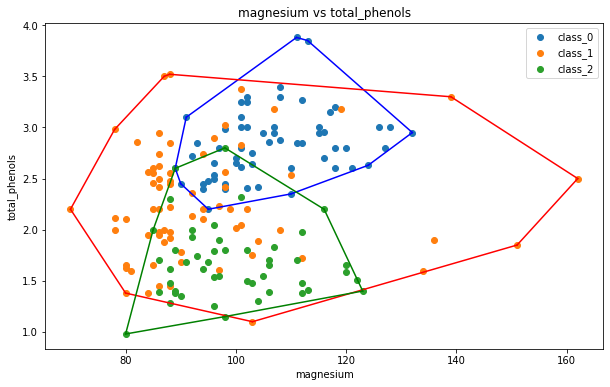

In [8]:
data = datasets.load_wine()
df = createDataFrame(data)
visualisasiConvexHull(df,4,5)

### 6. Dataset Wine: Flavanoids vs Non Flavanoid Phenols

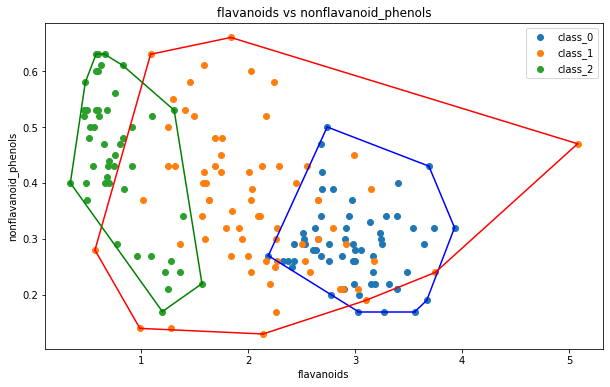

In [9]:
data = datasets.load_wine()
df = createDataFrame(data)
visualisasiConvexHull(df,6,7)

### 7. Dataset Breast Cancer: Mean Radius vs Mean Texture

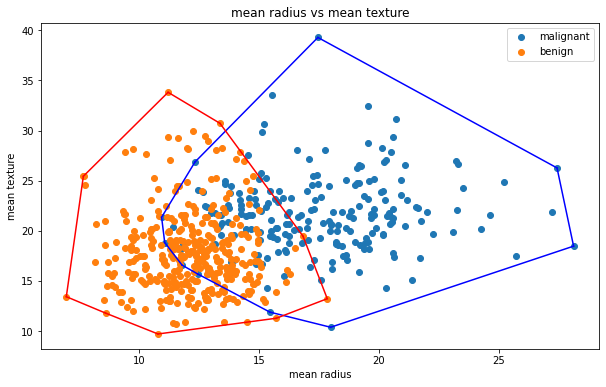

In [10]:
data = datasets.load_breast_cancer()
df = createDataFrame(data)
visualisasiConvexHull(df,0,1)

### 8. Dataset Breast Cancer: Worst Radius vs Worst Texture

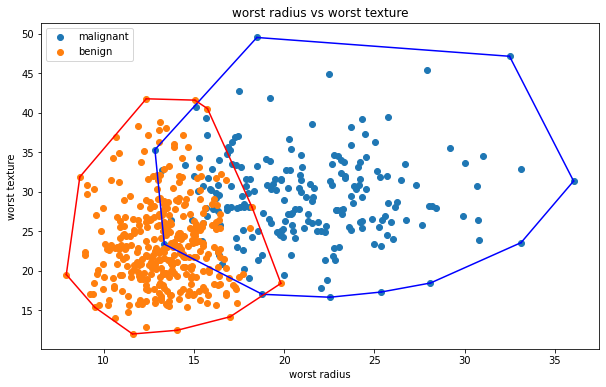

In [11]:
data = datasets.load_breast_cancer()
df = createDataFrame(data)
visualisasiConvexHull(df,20,21)

### 9. Dataset Digit: Pixel 1 1 vs Pixel 1 2

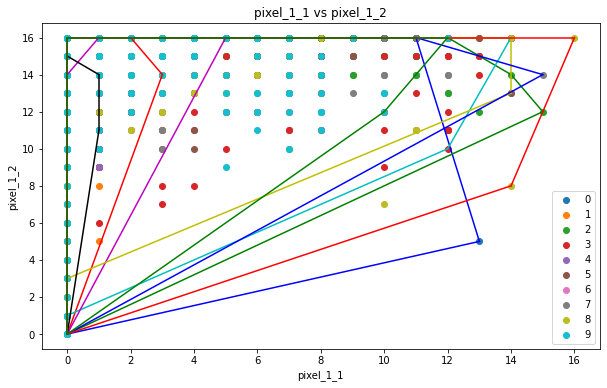

In [12]:
data = datasets.load_digits()
df = createDataFrame(data)
visualisasiConvexHull(df,9,10)

### 10. Dataset Digit: Pixel 6 1 vs Pixel 6 2

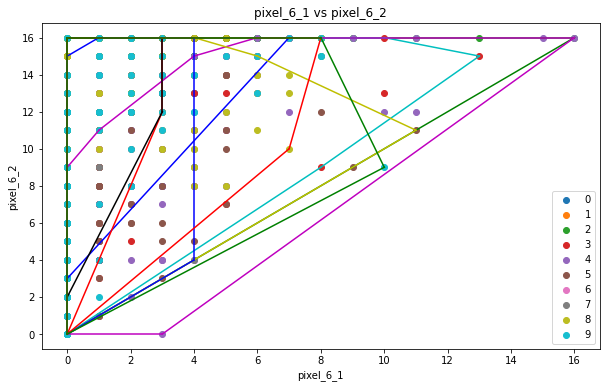

In [13]:
data = datasets.load_digits()
df = createDataFrame(data)
visualisasiConvexHull(df,49,50)